## Import 

In [536]:
#import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Read File

In [537]:
df=pd.read_csv("/content/portu_banking_final.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [538]:
df.shape

(41188, 21)

In [539]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [540]:
columns= df.columns.values
print("Features: ",columns)

Features:  ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']


In [541]:
print(df.dtypes)

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [542]:
print("Age is specified as an object when it is integer")
print("coverting age datatype")

Age is specified as an object when it is integer
coverting age datatype


In [543]:
df.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [544]:
df1=df

In [545]:
df1.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

### change age to single integer values

In [546]:
import re
s=""
i=-1
for ag in df1.age:
  i+=1
  a=re.search("\d\d-\d\d", str(ag))
  if a!=None:
    print(a)
    print(i)

<re.Match object; span=(0, 5), match='35-30'>
74
<re.Match object; span=(0, 5), match='30-35'>
149
<re.Match object; span=(0, 5), match='25-30'>
480
<re.Match object; span=(0, 5), match='18-25'>
858
<re.Match object; span=(0, 5), match='30-32'>
967
<re.Match object; span=(0, 5), match='50-55'>
1085
<re.Match object; span=(0, 5), match='30-35'>
1457
<re.Match object; span=(0, 5), match='30-35'>
2571
<re.Match object; span=(0, 5), match='45-50'>
6475
<re.Match object; span=(0, 5), match='20-25'>
6987
<re.Match object; span=(0, 5), match='20-40'>
7190
<re.Match object; span=(0, 5), match='35-40'>
9832
<re.Match object; span=(0, 5), match='30-40'>
28550


In [547]:
df1.at[74,'age']=33
df1.at[149,'age']=32
df1.at[480,'age']=28
df1.at[858,'age']=21
df1.at[967,'age']=31
df1.at[1085,'age']=53
df1.at[1457,'age']=32
df1.at[2571,'age']=33
df1.at[6475,'age']=47
df1.at[6987,'age']=23
df1.at[7190,'age']=30
df1.at[9832,'age']=38
df1.at[28550,'age']=35


In [548]:
df1.age=pd.to_numeric(df1.age)

## Check for missing values and datatypes

In [550]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [551]:
df1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [552]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## EDA and Visualization

In [553]:
#pre processing
def categorize(df):
    new_df = df1.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [554]:
df1.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

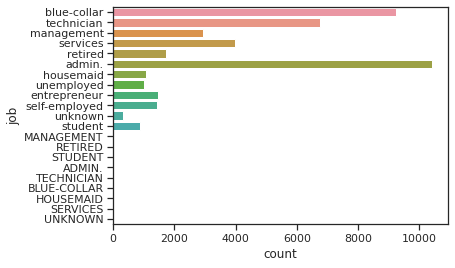

In [555]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df1)

In [556]:
data = df1[df1.job != 'unknown']

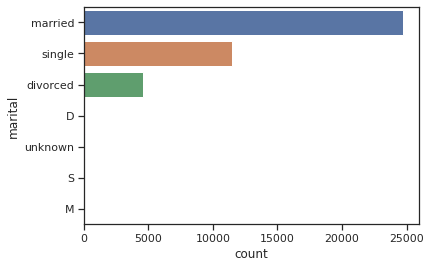

In [557]:
sns.countplot(y='marital', data=data)

In [558]:
data.marital.value_counts()

married     24690
single      11491
divorced     4595
unknown        71
M               5
D               4
S               3
Name: marital, dtype: int64

In [559]:
data= data.replace(['M','D','S'],['married','divorced','single'])

In [560]:
data.marital.value_counts()

married     24695
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

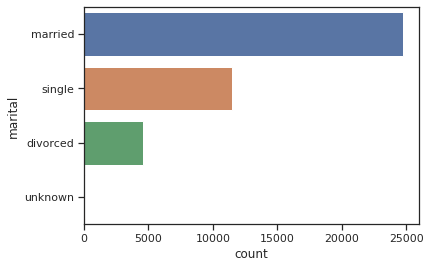

In [561]:
sns.countplot(y='marital', data=data)

In [562]:
data.fillna(method='ffill')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [563]:
data.y.value_counts()

0    36256
1     4603
Name: y, dtype: int64

In [564]:
cols=data.columns.values

In [565]:
for i in cols:
  print(i)
  print(data[i].value_counts())
  print()


age
31    1945
32    1833
33    1831
36    1776
35    1746
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

job
admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
SERVICES             3
RETIRED              3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
UNKNOWN              1
HOUSEMAID            1
BLUE-COLLAR          1
Name: job, dtype: int64

marital
married     24695
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

education
basic                  12382
university.degree      12123
high.school             9478
professional.course     5231
unknown                 1600
illiterate                18
basic-4y                  12
basic-9y                   

In [566]:
data.replace(['basic-4y','basic-9y','basic-6y'],'basic',inplace=True)

In [567]:
data.education.value_counts()

basic                  12409
university.degree      12123
high.school             9478
professional.course     5231
unknown                 1600
illiterate                18
Name: education, dtype: int64

In [568]:
data.replace(['SERVICES','RETIRED','ADMIN.','STUDENT','BLUE-COLLAR','MANAGEMENT','TECHNICIAN','UNKNOWN','HOUSEMAID'],['services','retired','admin','student','blue-collar','management','technician','unknown','housemaid'],inplace=True)

In [569]:
data.job.value_counts()

admin.           10420
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
admin                2
unknown              1
Name: job, dtype: int64

In [570]:
data.job.replace('admin.','admin',inplace=True)

In [571]:
data.job.value_counts()

admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown              1
Name: job, dtype: int64

In [572]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [573]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

## Grouping for in-depth information

In [574]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.866891,220.971812,2.632750,985.591764,0.132668,0.246423,93.602596,-40.606804,3.808752,5176.113865
1,40.863784,553.475994,2.048881,791.884206,0.491636,-1.233674,93.353350,-39.803150,2.121507,5095.114990


In [575]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,38.186912,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555111,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947220,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [576]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.882148,254.050011,2.614481,968.769950,0.168080,0.165101,93.606654,-40.713590,3.716686,5170.961383,0.102848
married,42.250456,257.900628,2.571614,968.079328,0.156104,0.180065,93.596053,-40.288091,3.741825,5171.749196,0.101883
single,33.135810,260.946581,2.535062,952.722203,0.210806,-0.167122,93.516445,-40.925431,3.318018,5155.276744,0.139638
unknown,40.267606,319.042254,3.042254,929.253521,0.309859,-0.414085,93.403704,-40.860563,3.108606,5149.998592,0.126761


In [577]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.141027,263.152148,2.558385,976.446692,0.141430,0.188355,93.638807,-40.941575,3.726215,5171.929164,0.087275
high.school,37.981853,261.030703,2.569318,964.433108,0.186221,0.030544,93.583850,-40.947879,3.553797,5164.931768,0.108567
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.069776,252.312560,2.587459,962.779010,0.163066,0.176008,93.570330,-40.118639,3.713255,5170.268132,0.113554
university.degree,38.883610,253.080426,2.565949,953.528252,0.191867,-0.025843,93.493468,-39.984732,3.531673,5163.357354,0.136847
unknown,42.953750,266.735625,2.563750,942.578125,0.232500,0.014937,93.651313,-39.994750,3.520074,5157.600312,0.146250


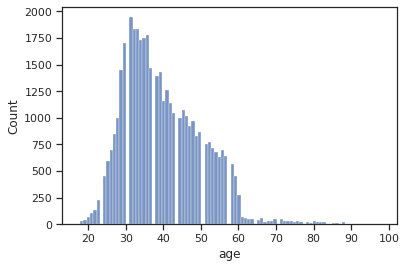

In [578]:
sns.histplot(data['age'])
#plt.lab
plt.show()

In [579]:
df=data

In [580]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

<function matplotlib.pyplot.show>

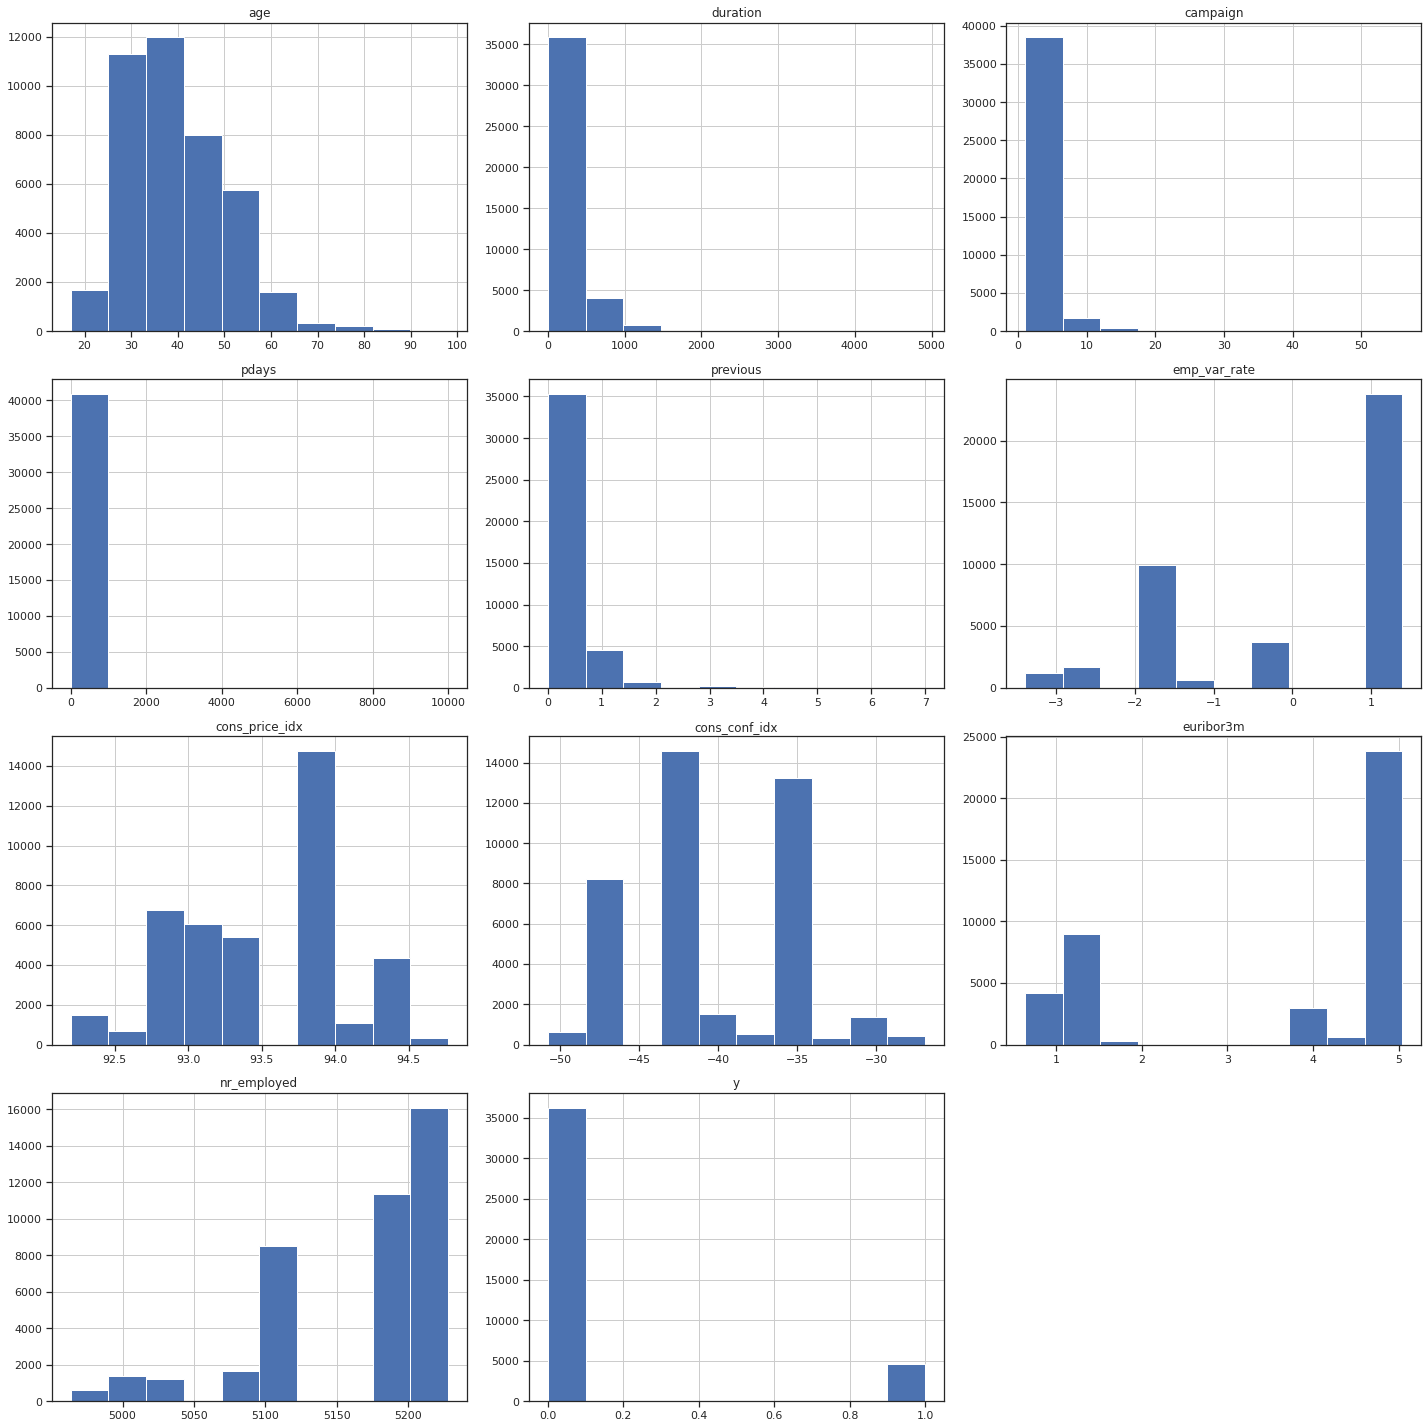

In [581]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show

In [582]:
x=df.iloc[:]
print(x)
#df.plot.bar(y=df.y)

       age          job  marital  ... euribor3m nr_employed  y
0       44  blue-collar  married  ...     4.963      5228.1  0
1       53   technician  married  ...     4.021      5195.8  0
2       28   management   single  ...     0.729      4991.6  1
3       39     services  married  ...     1.405      5099.1  0
4       55      retired  married  ...     0.869      5076.2  1
...    ...          ...      ...  ...       ...         ... ..
41183   59      retired  married  ...     4.866      5228.1  0
41184   31    housemaid  married  ...     4.860      5191.0  0
41185   42        admin   single  ...     4.857      5191.0  0
41186   48   technician  married  ...     0.742      5017.5  0
41187   25      student   single  ...     4.859      5191.0  0

[40859 rows x 21 columns]


In [583]:
import numpy as np

In [584]:
df1=df

In [585]:
df1.shape

(40859, 21)

## Converting unknown into NaN and filling them

In [586]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [587]:
df1.default=df1.default.replace(to_replace='unknown',value=np.nan)

In [588]:
df1.shape

(40859, 21)

In [589]:
df1.default.value_counts(dropna=False)

no     32411
NaN     8445
yes        3
Name: default, dtype: int64

In [590]:
df1.default.value_counts(normalize=True)

no     0.999907
yes    0.000093
Name: default, dtype: float64

In [591]:
df1.default=df1.default.fillna(pd.Series(np.random.choice(['no','yes'],p=[0.999907,0.000093],size=len(df))))

In [592]:
cols=df1.columns.values
for i in cols:
  print(i)
  print(df1[i].value_counts())
  print()


age
31    1945
32    1833
33    1831
36    1776
35    1746
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

job
admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown              1
Name: job, dtype: int64

marital
married     24695
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

education
basic                  12409
university.degree      12123
high.school             9478
professional.course     5231
unknown                 1600
illiterate                18
Name: education, dtype: int64

default
no     40775
yes        4
Name: default, dtype: int64

housing
yes        21404
no         18470
unknown      985
Name: housing, dtype: int64

loan
no         33683
yes         6191
unknown      985
Na

In [593]:
df1.shape

(40859, 21)

In [594]:
df1.default.value_counts(dropna=False)

no     40775
NaN       80
yes        4
Name: default, dtype: int64

In [595]:
df1 = df1.fillna(value='no')

In [596]:
df1.default.value_counts(dropna=False)

no     40855
yes        4
Name: default, dtype: int64

In [597]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [598]:
df1.education=df1.education.replace(to_replace='unknown',value=np.nan)

In [599]:
df1.education.value_counts(dropna=False)

basic                  12409
university.degree      12123
high.school             9478
professional.course     5231
NaN                     1600
illiterate                18
Name: education, dtype: int64

In [600]:
df1.education.value_counts(normalize=True)

basic                  0.316080
university.degree      0.308795
high.school            0.241422
professional.course    0.133243
illiterate             0.000458
Name: education, dtype: float64

In [601]:
df1.education=df1.education.fillna(pd.Series(np.random.choice(['basic','university.degree','high.school','professional.course'],p=[0.316260,0.308887,0.241518,0.133335],size=len(df))))

In [602]:
df1.education.value_counts(dropna=False)

basic                  12887
university.degree      12618
high.school             9866
professional.course     5462
illiterate                18
NaN                        8
Name: education, dtype: int64

In [603]:
df1.education=df1.education.fillna(value='basic')

In [604]:
df1.education.value_counts(dropna=False)

basic                  12895
university.degree      12618
high.school             9866
professional.course     5462
illiterate                18
Name: education, dtype: int64

In [605]:
df1.housing=df1.housing.replace(to_replace='unknown',value=np.nan)

In [606]:
df1.housing.value_counts(dropna=False)

yes    21404
no     18470
NaN      985
Name: housing, dtype: int64

In [607]:
df1.housing.value_counts(normalize=True)

yes    0.536791
no     0.463209
Name: housing, dtype: float64

In [608]:
df1.housing=df1.housing.fillna(pd.Series(np.random.choice(['yes','no'],p=[0.536791,0.463209],size=len(df))))

In [609]:
df1.housing.value_counts(dropna=False)

yes    21955
no     18897
NaN        7
Name: housing, dtype: int64

In [610]:
df1.housing=df1.housing.fillna(value='yes')

In [611]:
df1.loan=df1.loan.replace(to_replace='unknown',value=np.nan)

In [612]:
df1.loan.value_counts(dropna=False)

no     33683
yes     6191
NaN      985
Name: loan, dtype: int64

In [613]:
df1.loan.value_counts(normalize=True)

no     0.844736
yes    0.155264
Name: loan, dtype: float64

In [614]:
df1.loan=df1.loan.fillna(pd.Series(np.random.choice(['yes','no'],p=[0.844736,0.155264],size=len(df))))

In [615]:
df1.loan.value_counts(dropna=False)

no     33851
yes     7001
NaN        7
Name: loan, dtype: int64

In [616]:
df1.loan=df1.loan.fillna(value='yes')

In [617]:
df1.marital=df1.marital.replace(to_replace='unknown',value=np.nan)

In [618]:
df1.marital.value_counts(dropna=False)

married     24695
single      11494
divorced     4599
NaN            71
Name: marital, dtype: int64

In [619]:
df1.marital.value_counts(normalize=True)

married     0.605448
single      0.281799
divorced    0.112754
Name: marital, dtype: float64

In [620]:
df1.loan=df1.loan.fillna(pd.Series(np.random.choice(['married','single','divorced'],p=[0.605448,0.281798,0.112754],size=len(df))))

In [621]:
df1.marital.value_counts(dropna=False)

married     24695
single      11494
divorced     4599
NaN            71
Name: marital, dtype: int64

In [622]:
df1.marital=df1.marital.fillna(value='married')

In [623]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [624]:
df1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


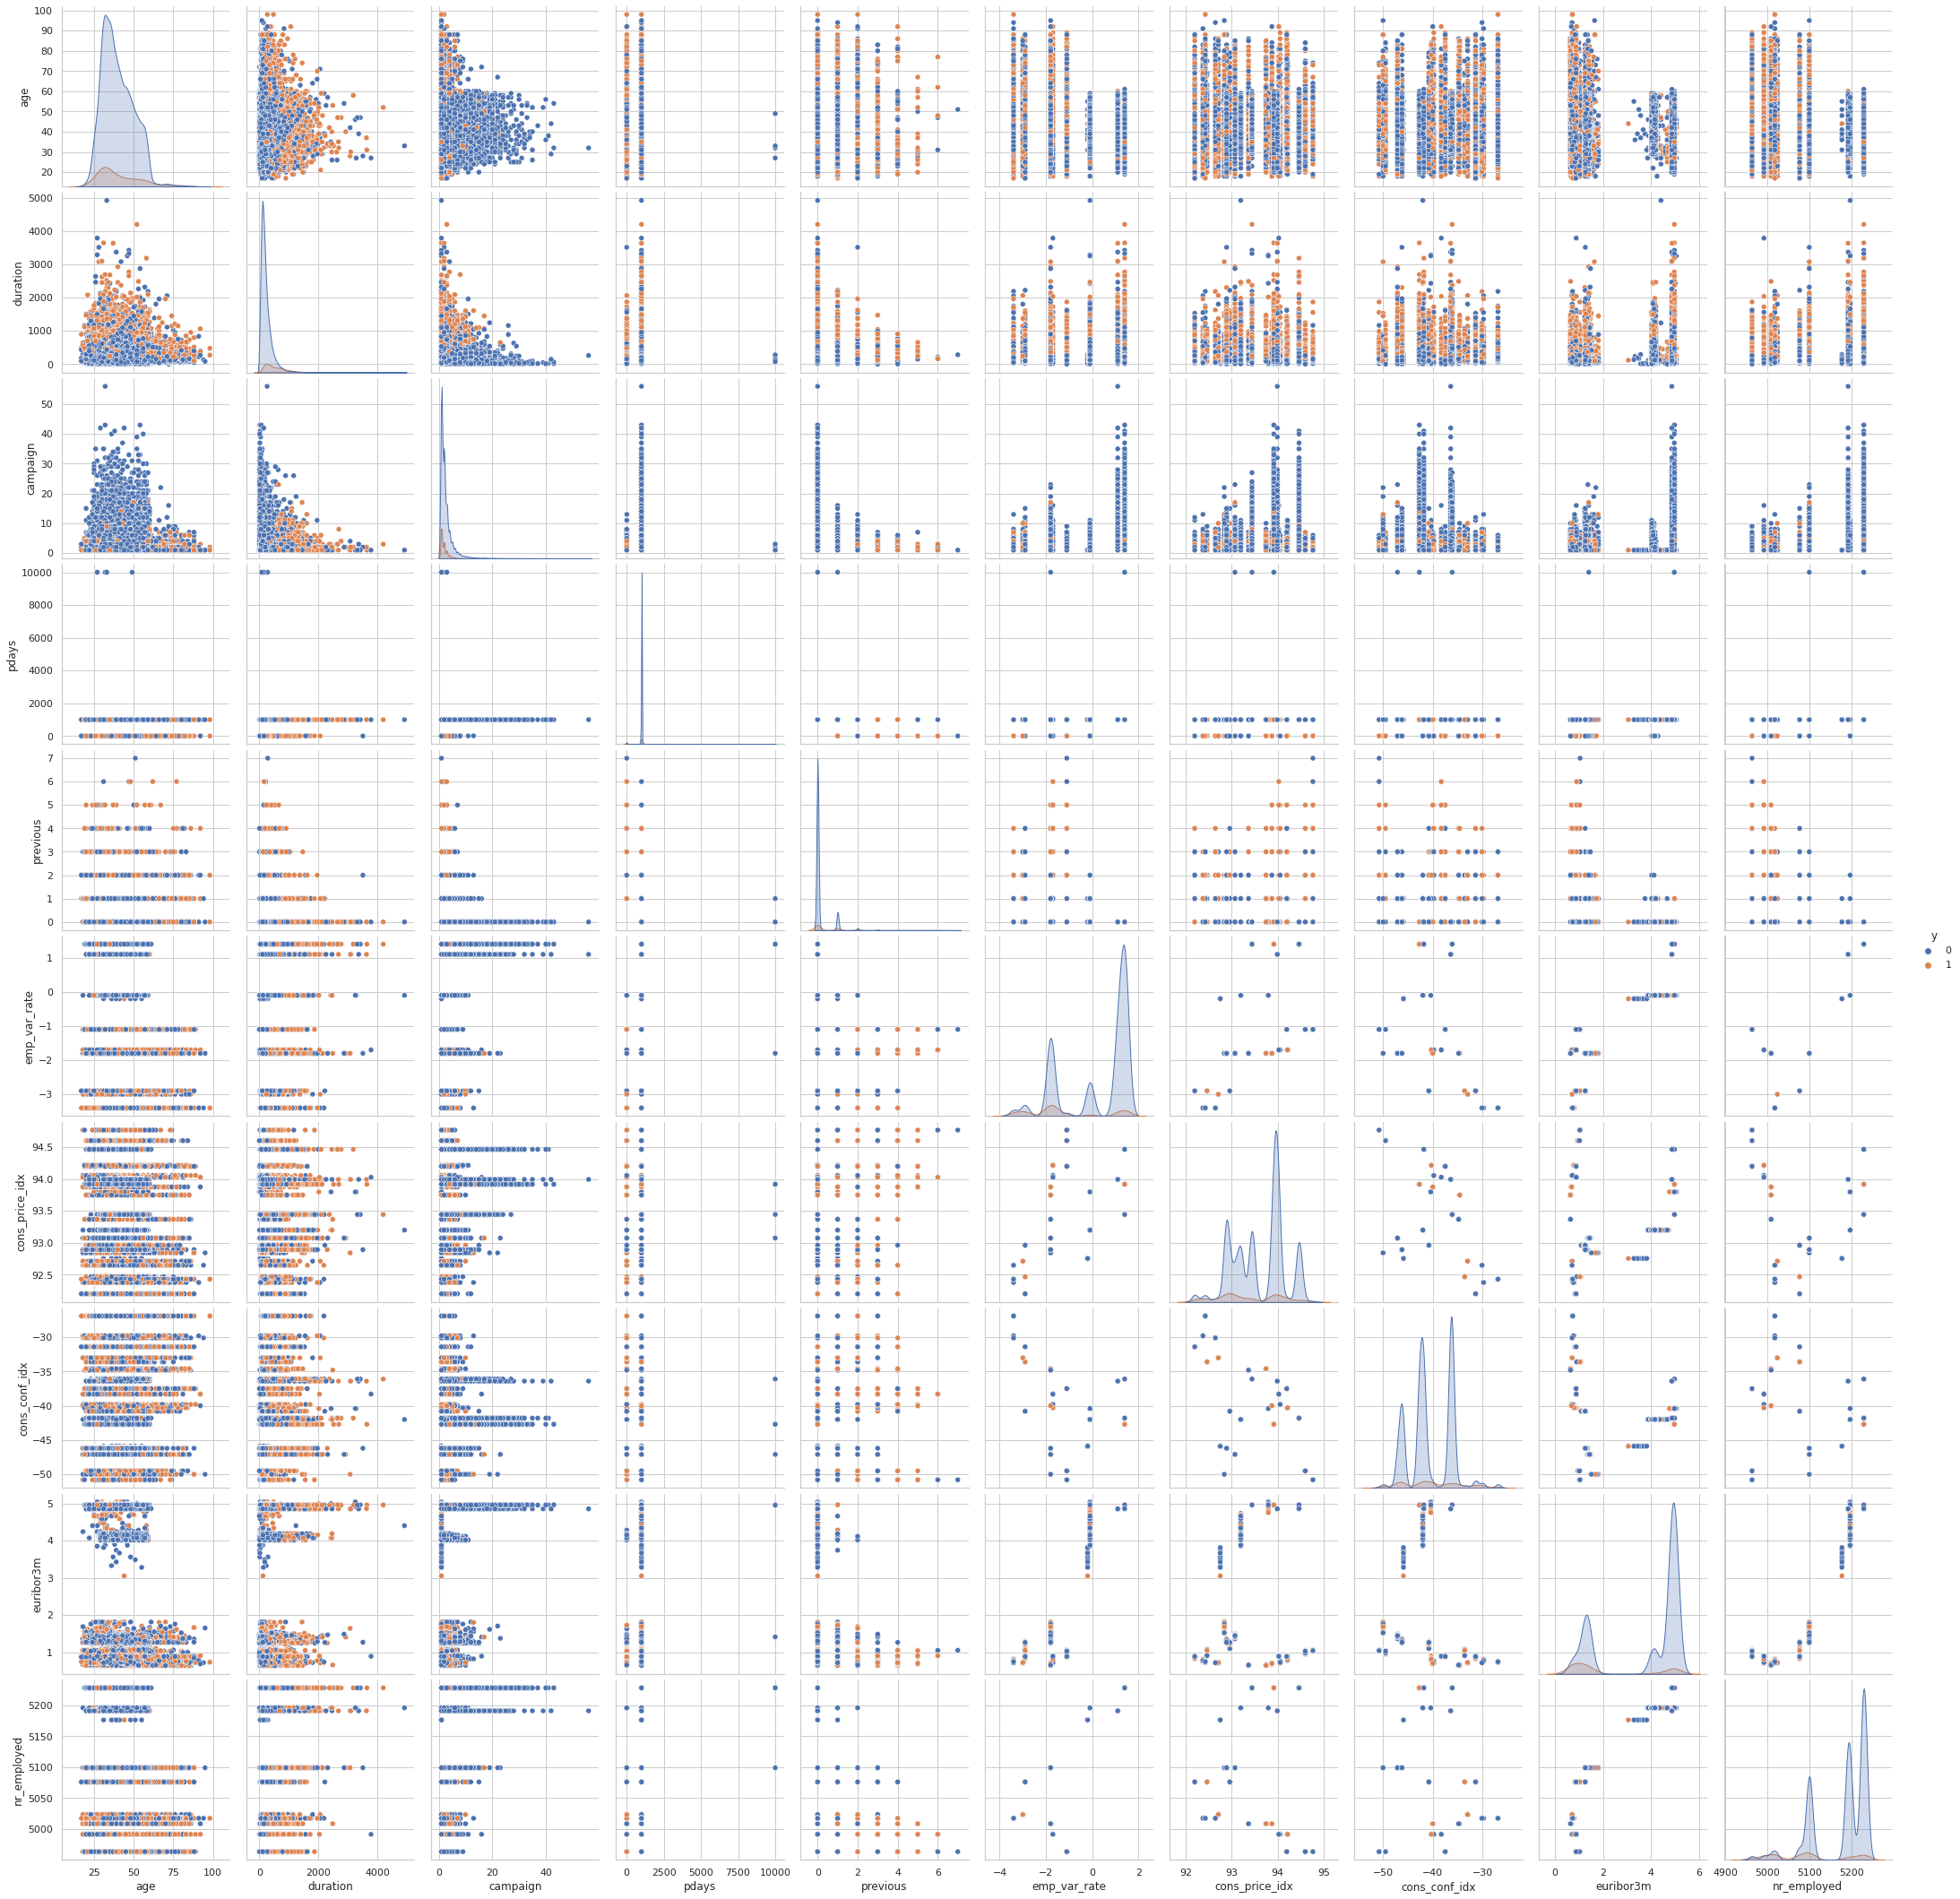

In [625]:
sns.set_style("whitegrid");
sns.pairplot(df1,hue="y",size=3);
plt.show()

In [626]:
df1.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.866891,220.971812,2.632750,985.591764,0.132668,0.246423,93.602596,-40.606804,3.808752,5176.113865
1,40.863784,553.475994,2.048881,791.884206,0.491636,-1.233674,93.353350,-39.803150,2.121507,5095.114990


In [627]:
df1.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,38.186912,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555111,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947220,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [628]:
df1.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.882148,254.050011,2.614481,968.769950,0.168080,0.165101,93.606654,-40.713590,3.716686,5170.961383,0.102848
married,42.244771,258.075911,2.572963,967.968021,0.156545,0.178361,93.595501,-40.289732,3.740010,5171.686841,0.101954
single,33.135810,260.946581,2.535062,952.722203,0.210806,-0.167122,93.516445,-40.925431,3.318018,5155.276744,0.139638


In [629]:
df1.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.162776,263.187747,2.558434,975.451803,0.144009,0.180551,93.638809,-40.908709,3.717171,5171.307460,0.089415
high.school,38.194912,261.713156,2.563856,963.377255,0.188932,0.031249,93.587049,-40.908413,3.554442,5164.733215,0.109974
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.184548,252.350055,2.592091,961.949286,0.167338,0.167155,93.573165,-40.117375,3.702469,5169.688576,0.114061
university.degree,39.041766,253.607386,2.567681,952.953796,0.193058,-0.023094,93.499968,-39.982073,3.532111,5163.163734,0.137740


In [630]:
df1.shape

(40859, 21)

## Frequency of buying vs different features

In [703]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [704]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,high.school,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [705]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f3d80e510>,
      dtype=object)

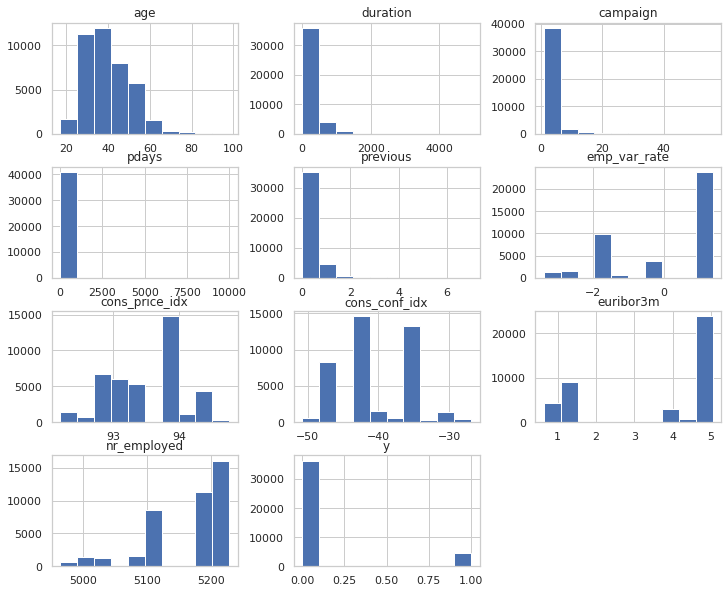

In [706]:
df1.hist(figsize=(12,10))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

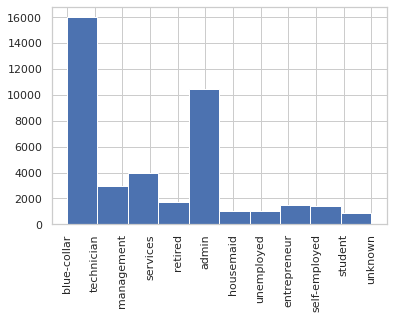

In [707]:
plt.hist(df1.job)
plt.xticks(rotation = 90)

In [708]:
purf=df1.loc[(df1.y==1)]

In [709]:
purf.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [710]:
purf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

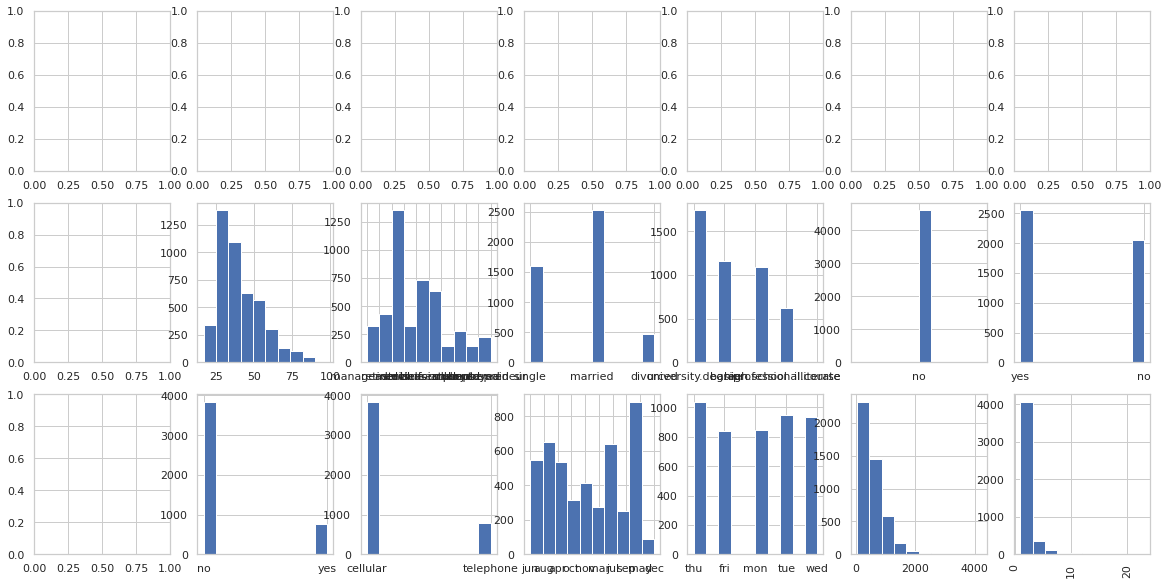

In [711]:
cols=purf.columns
n=0
#plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20,10))
plt.xticks(rotation=90)
for i in range (1,3):
  for j in range(1,7):
    #.subplot(i,j,n+1)
    axes[i,j].hist(purf[cols[n]])
    n+=1
plt.show()

(array([1605.,    0.,    0.,    0.,    0., 2525.,    0.,    0.,    0.,
         473.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

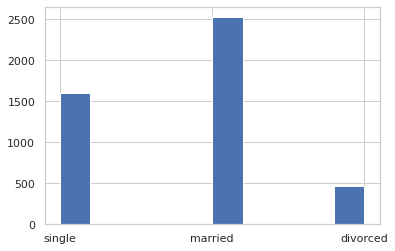

In [713]:
plt.hist(purf.marital)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

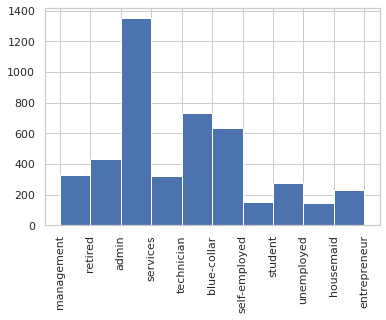

In [714]:
plt.hist(purf.job)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

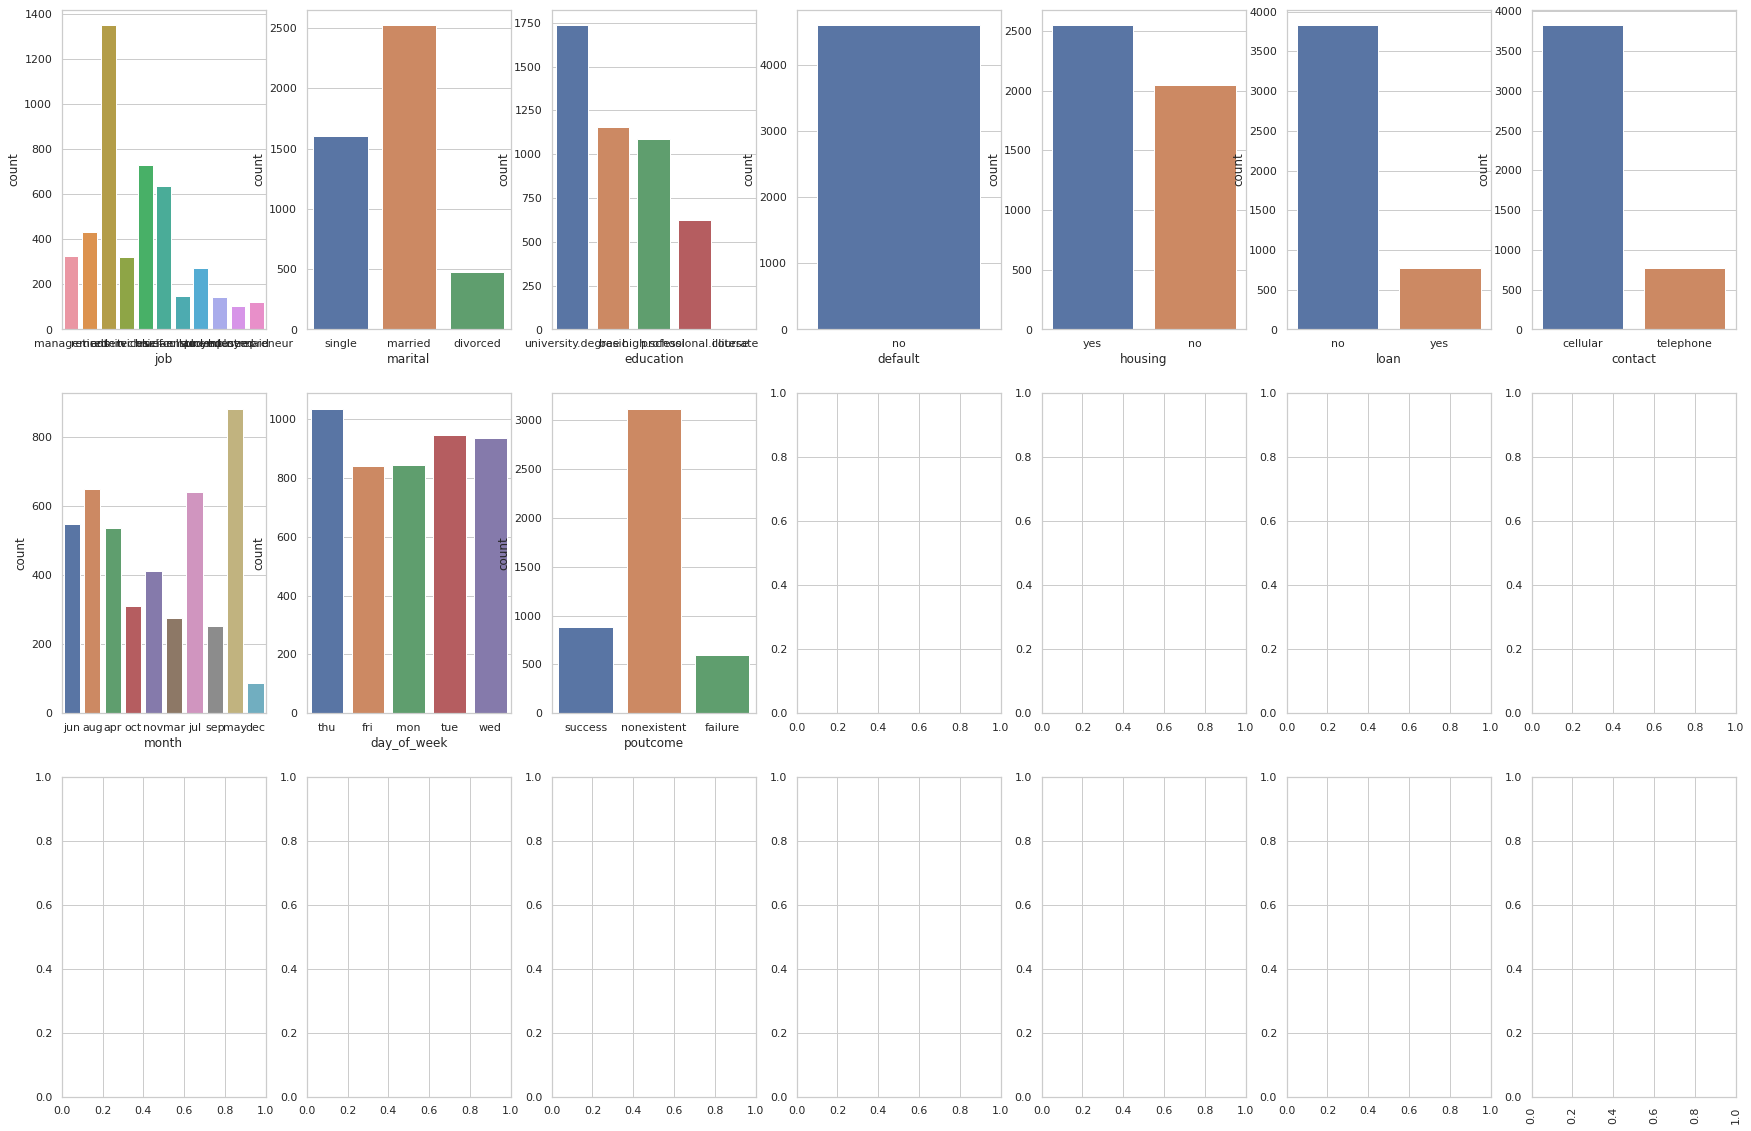

In [715]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df1:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df1[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 7, figsize = (30,20))
plt.tick_params(axis='x', rotation=90)

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    #plt.xticks(rotation=90)
    sns.countplot(purf[variable], ax = subplot)
    

    
# display the plot

plt.show()

(array([1.6580e+03, 1.1300e+04, 1.1975e+04, 7.9920e+03, 5.7460e+03,
        1.5790e+03, 3.1300e+02, 1.9700e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

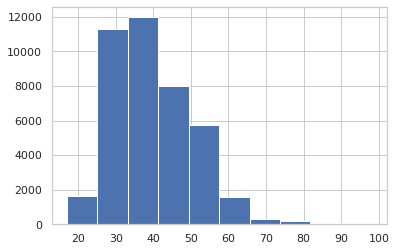

In [716]:
plt.hist(df1.age)

In [717]:
df_numeric_features =X.select_dtypes(include=np.number)
df_numeric_features.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2


In [718]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,high.school,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [719]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

## Dealing with categorical variables using dummies

In [720]:
df_categoric_features = df1.select_dtypes(include = object)
df_categoric_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [721]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [722]:
df2 = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

In [723]:
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [724]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40859 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            40859 non-null  int64  
 1   duration                       40859 non-null  int64  
 2   campaign                       40859 non-null  int64  
 3   pdays                          40859 non-null  float64
 4   previous                       40859 non-null  int64  
 5   emp_var_rate                   40859 non-null  float64
 6   cons_price_idx                 40859 non-null  float64
 7   cons_conf_idx                  40859 non-null  float64
 8   euribor3m                      40859 non-null  float64
 9   nr_employed                    40859 non-null  float64
 10  job_blue-collar                40859 non-null  uint8  
 11  job_entrepreneur               40859 non-null  uint8  
 12  job_housemaid                  40859 non-null 

In [725]:
X=df2

In [726]:
y.dtypes

dtype('int64')

## Model fitting and evaluation

In [727]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [728]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [729]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [730]:
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7230
           1       0.67      0.39      0.50       942

    accuracy                           0.91      8172
   macro avg       0.80      0.68      0.72      8172
weighted avg       0.90      0.91      0.90      8172



In [731]:
print( "The accuracy of the Model",accuracy_score(y_test, predictions))


The accuracy of the Model 0.9074889867841409


In [737]:
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

### SMOTE ANALYSIS and RFE

In [738]:
y.value_counts(normalize=True) # imbalanced classes

0    0.887344
1    0.112656
Name: y, dtype: float64

In [739]:
#X = df2.loc[:, df2.columns != 'y']
#y = df2.loc[:, df2.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  50782
Number of no subscription in oversampled data 25391
Number of subscription 25391
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [740]:
df2['y']=df1['y']

In [741]:
df2.y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 40859, dtype: int64

In [824]:
data_final_vars=df2.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 40)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
 False  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 1 3 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 7 1 1 1 4 1 1 6 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [825]:
df2.shape

(40859, 47)

In [826]:
cols=df2.columns

In [827]:
ncols=[]
for i in range(0,46):
  if rfe.support_[i]==True:
    ncols= ncols + [cols[i]]

In [828]:
print(ncols)

['age', 'duration', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_high.school', 'education_professional.course', 'education_university.degree', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


In [829]:
len(ncols)

40

In [830]:
X=os_data_X[ncols]
y=os_data_y['y']

In [831]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.325889
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.530     
Dependent Variable:      y                    AIC:                  33178.6298
Date:                    2021-09-09 20:13     BIC:                  33532.0417
No. Observations:        50782                Log-Likelihood:       -16549.   
Df Model:                39                   LL-Null:              -35199.   
Df Residuals:            50742                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [832]:
X=X.drop(['job_entrepreneur','day_of_week_mon'],axis=1)

In [833]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.326012
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.530     
Dependent Variable:      y                    AIC:                  33187.0793
Date:                    2021-09-09 20:13     BIC:                  33522.8206
No. Observations:        50782                Log-Likelihood:       -16556.   
Df Model:                37                   LL-Null:              -35199.   
Df Residuals:            50744                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [834]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [835]:
#print(result.summary2())

In [836]:
y_pred = logreg.predict(X_test)
print('Accuracy of a regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of a regression classifier on test set: 0.86


In [837]:
print( "The accuracy of the Model",accuracy_score(y_test, y_pred))

The accuracy of the Model 0.8553987528716771


In [838]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7650
           1       0.85      0.87      0.86      7585

    accuracy                           0.86     15235
   macro avg       0.86      0.86      0.86     15235
weighted avg       0.86      0.86      0.86     15235

